In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
# show all columns in the dataframe

pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv("bellingcat_final_data.csv")
df.head()

,filename,duration,transcription,id,wpm,wp30,author,authorStats,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,followerCount,friendCount,heart,heartCount,videoCount,uniqueId,nickname,authorId
0,bellingcat-tool/amazonfinds/media/735665769517...,13,Let's do this.,7356657695170006278,13.846154,6.923077,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 258, 'followerCount': 17500, 'fo...",1712855349,Sad hamster plush toy 🥺🎀 Link in bio🥺 #sadhams...,False,"{'collectCount': 127800, 'commentCount': 9164,...","{'collectCount': '127750', 'commentCount': '91...",127800.0,9164.0,258.0,8900000.0,289000.0,17500.0,0.0,1700000.0,1700000.0,161.0,plushy_town,🎀HAMPTER PLUSH🎀,7346295827809813509
1,bellingcat-tool/amazonfinds/media/696346498578...,16,Nobody's gonna know. Nobody's gonna know. The...,6963464985787813126,60.000000,30.000000,{'avatarLarger': 'https://p16-pu-sign-useast8....,"{'diggCount': 64100, 'followerCount': 4400000,...",1621308040,lmaoo how would they know? book case with key ...,False,"{'collectCount': 84600, 'commentCount': 7568, ...","{'collectCount': '84550', 'commentCount': '756...",84600.0,7568.0,64100.0,10300000.0,22200.0,4400000.0,0.0,205500000.0,205500000.0,630.0,heartdefensor,Heart Defensor,55842125203939328
2,bellingcat-tool/amazonfinds/media/736366566699...,0,Gone don't leave soranchise geo whole,7363665666995539206,NaN,NaN,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 10, 'followerCount': 40500, 'fol...",1714487020,Best amazon finds for your room #amazonmusthav...,False,"{'collectCount': 262100, 'commentCount': 977, ...","{'collectCount': '262102', 'commentCount': '97...",262100.0,977.0,10.0,4300000.0,29900.0,40500.0,0.0,800100.0,800100.0,9.0,findsforwomen,DHGate Finds,7360194839546151941
3,bellingcat-tool/amazonfinds/media/690437904749...,15,This is to all the moms out there because obv...,6904379047493504262,152.000000,76.000000,{'avatarLarger': 'https://p16-sign.tiktokcdn-u...,"{'diggCount': 14800, 'followerCount': 78300, '...",1607551039,🦷 #fyp #babyteeth #toothbox #toothfairy #momha...,False,"{'collectCount': 95700, 'commentCount': 4888, ...","{'collectCount': '95682', 'commentCount': '488...",95700.0,4888.0,14800.0,8100000.0,20900.0,78300.0,0.0,2900000.0,2900000.0,148.0,jjeennni,jjeennni,6734109397343192070
4,bellingcat-tool/amazonfinds/media/688435049373...,30,Random things on Amazon that just make sense....,6884350493737405701,212.000000,106.000000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 30100, 'followerCount': 174200, ...",1602887793,For all my WFH friends ✨ #flexispot #flexispot...,False,"{'collectCount': 203600, 'commentCount': 8349,...","{'collectCount': '203555', 'commentCount': '83...",203600.0,8349.0,30100.0,16300000.0,185600.0,174200.0,0.0,9900000.0,9900000.0,400.0,treyfoundjules,treyfoundjules,6763957568730940422


In [7]:
%%R -i df

df <- df

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = playCount ~ wpm, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-12866489  -6983145  -3578938   1777173 142867879 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16049593     772429  20.778  < 2e-16 ***
wpm           -18467       4363  -4.233 2.55e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13910000 on 876 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.02004,	Adjusted R-squared:  0.01892 
F-statistic: 17.92 on 1 and 876 DF,  p-value: 2.552e-05



In addition: Warning messages:
1: Removed 30 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 30 rows containing missing values or values outside the scale range
(`geom_point()`). 


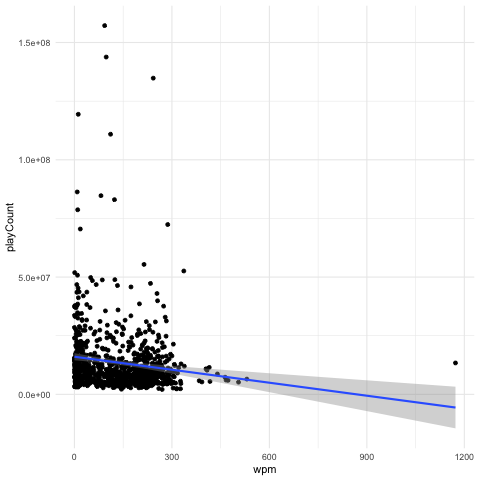

In [8]:
%%R

plt <- ggplot(df, aes(x=wpm, y=playCount)) + geom_point() + geom_smooth(method = 'lm') + theme_minimal()
print(plt)

model <- lm(playCount ~ wpm, data=df)
summary(model)

In [9]:
%%R

model <- lm(playCount ~ wpm + commentCount + shareCount + followerCount, data=df)
summary(model)


Call:
lm(formula = playCount ~ wpm + commentCount + shareCount + followerCount, 
    data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-39164657  -4844418  -1932374   2011476 128473875 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.445e+06  7.471e+05  12.642   <2e-16 ***
wpm           -1.167e+04  3.591e+03  -3.249   0.0012 ** 
commentCount   5.421e+02  5.222e+01  10.383   <2e-16 ***
shareCount     4.322e+01  4.592e+00   9.412   <2e-16 ***
followerCount  5.604e-02  1.187e-01   0.472   0.6368    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11370000 on 873 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.347,	Adjusted R-squared:  0.344 
F-statistic:   116 on 4 and 873 DF,  p-value: < 2.2e-16



In [10]:
%%R

model <- lm(playCount ~ wp30 + commentCount + shareCount + followerCount + duration, data=df)
summary(model)


Call:
lm(formula = playCount ~ wp30 + commentCount + shareCount + followerCount + 
    duration, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-39180437  -4842538  -1944957   2004463 128478312 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.418e+06  8.392e+05  11.223  < 2e-16 ***
wp30          -2.336e+04  7.198e+03  -3.246  0.00122 ** 
commentCount   5.420e+02  5.231e+01  10.361  < 2e-16 ***
shareCount     4.324e+01  4.599e+00   9.401  < 2e-16 ***
followerCount  5.544e-02  1.190e-01   0.466  0.64151    
duration       8.673e+02  1.235e+04   0.070  0.94401    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11380000 on 872 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.347,	Adjusted R-squared:  0.3432 
F-statistic: 92.67 on 5 and 872 DF,  p-value: < 2.2e-16

